In [10]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import fetch_openml
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [5]:
# Загрузка данных MNIST
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data[:5000]

In [ ]:
#X = mnist
#y = y[X.index]

In [6]:
# Алгоритм K-means
def kmeans_clustering(X, n_clusters=10):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    labels = kmeans.labels_
    return labels

In [14]:
# Иерархический алгоритм кластеризации
def hierarchical_clustering(X, dist_matrix, n_clusters=10, method='ward'):
    Z = linkage(dist_matrix, method=method)
    labels = fcluster(Z, t=n_clusters, criterion='maxclust')
    return Z, labels

C:\Users\kocor\AppData\Local\Temp\ipykernel_5468\1101258840.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(dist_matrix, method=method)


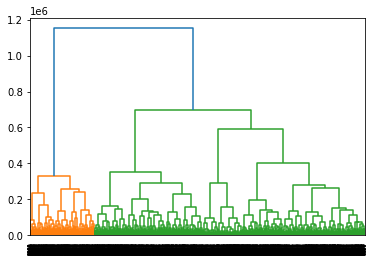

In [15]:
from scipy.spatial.distance import squareform, pdist
from scipy.cluster.hierarchy import fcluster
kmeans_labels = kmeans_clustering(X)
dist_matrix = squareform(pdist(X)) # Вычисление матрицы расстояний между изображениями
Z, hierarchical_labels = hierarchical_clustering(X, dist_matrix)

dendro = dendrogram(Z)

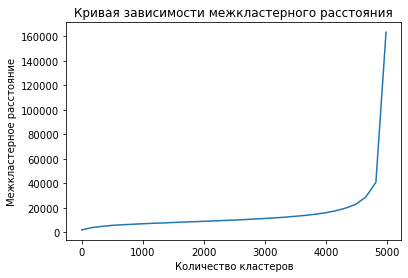

In [16]:
# Построение кривой зависимости межкластерного расстояния

max_clusters = len(X) + 1
step = max_clusters // 30
clusters_value = np.arange(1, max_clusters, step)
distances = []
for n_clusters in clusters_value:
    distances.append(Z[n_clusters, 2])
    #distances.append(Z[-n_clusters, 2])

plt.plot(clusters_value, distances)
plt.xlabel('Количество кластеров')
plt.ylabel('Межкластерное расстояние')
plt.title('Кривая зависимости межкластерного расстояния')
plt.show()

In [19]:
predicted_labels = kmeans_labels

kmeans_data = {"Silhouette Score": silhouette_score(X, predicted_labels)}
print(kmeans_data)

{'Silhouette Score': 0.06473825208164849}


In [21]:
predicted_labels = hierarchical_labels

hierarchical_data = {"Silhouette Score": silhouette_score(X, predicted_labels)}
print(hierarchical_data)

{'Silhouette Score': 0.017469484685130265}
